Importing Important Libraries

In [1]:
# importing the required libraries
import pandas as pd

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins

# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1.Reading the Datasets

In [2]:
#Reading a .xls file by creating a dataframe using pandas
# Reading the datasets
df= pd.read_excel('/content/drive/My Drive/COVID PREDICTION/Covid cases in India.xlsx')
df_india = df.copy()
df

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,9,0,0,0
1,2,Bihar,3,0,0,1
2,3,Chhattisgarh,1,0,0,0
3,4,Delhi,30,1,6,1
4,5,Gujarat,32,1,0,1
5,6,Haryana,14,14,11,0
6,7,Himachal Pradesh,3,0,0,1
7,8,Karnataka,41,0,3,1
8,9,Kerala,101,8,4,0
9,10,Madhya Pradesh,9,0,0,0


In [3]:
 #Coordinates of India States and Union Territories
India_coord = pd.read_excel('/content/drive/My Drive/COVID PREDICTION/Indian Coordinates.xlsx')

#Day by day data of India, Korea, Italy and Wuhan
dbd_India = pd.read_excel('/content/drive/My Drive/COVID PREDICTION/per_day_cases.xlsx',parse_dates=True, sheet_name='India')
dbd_Italy = pd.read_excel('/content/drive/My Drive/COVID PREDICTION/per_day_cases.xlsx',parse_dates=True, sheet_name="Italy")
dbd_Korea = pd.read_excel('/content/drive/My Drive/COVID PREDICTION/per_day_cases.xlsx',parse_dates=True, sheet_name="Korea")
dbd_Wuhan = pd.read_excel('/content/drive/My Drive/COVID PREDICTION/per_day_cases.xlsx',parse_dates=True, sheet_name="Wuhan")

2. Analysing the COVID19 Dataset

In [4]:

#Total case is the total number of confirmed cases (Indian National + Foreign National)

df.drop(['S. No.'],axis=1,inplace=True)
df['Total cases'] = df['Total Confirmed cases (Indian National)'] + df['Total Confirmed cases ( Foreign National )']
total_cases = df['Total cases'].sum()
print('Total number of confirmed COVID 2019 cases across India till date (22nd March, 2020):', total_cases)


Total number of confirmed COVID 2019 cases across India till date (22nd March, 2020): 562


In [5]:
#Learn how to highlight your dataframe
df.style.background_gradient(cmap='Reds')

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases
0,Andhra Pradesh,9,0,0,0,9
1,Bihar,3,0,0,1,3
2,Chhattisgarh,1,0,0,0,1
3,Delhi,30,1,6,1,31
4,Gujarat,32,1,0,1,33
5,Haryana,14,14,11,0,28
6,Himachal Pradesh,3,0,0,1,3
7,Karnataka,41,0,3,1,41
8,Kerala,101,8,4,0,109
9,Madhya Pradesh,9,0,0,0,9


3.Number of Active COVID cases

In [6]:
#Total Active  is the Total cases - (Number of death + Cured)
df['Total Active'] = df['Total cases'] - (df['Death'] + df['Cured'])
total_active = df['Total Active'].sum()
print('Total number of active COVID 2019 cases across India:', total_active)
Tot_Cases = df.groupby('Name of State / UT')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

Total number of active COVID 2019 cases across India: 512


,Total Active
Name of State / UT,
Kerala,105
Maharashtra,99
Karnataka,37
Telengana,34
Gujarat,32
Rajasthan,29
Punjab,28
Uttar Pradesh,24
Delhi,24


4.Visualising the spread geographically

In [7]:
# Learn how to use folium to create a zoomable map
df_full = pd.merge(India_coord,df,on='Name of State / UT')
map = folium.Map(location=[20, 70], zoom_start=4,tiles='Stamenterrain')

for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Total cases'], df_full['Name of State / UT']):
    folium.CircleMarker([lat, lon], radius=value*0.8, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map

 Confirmed vs Recovered figures

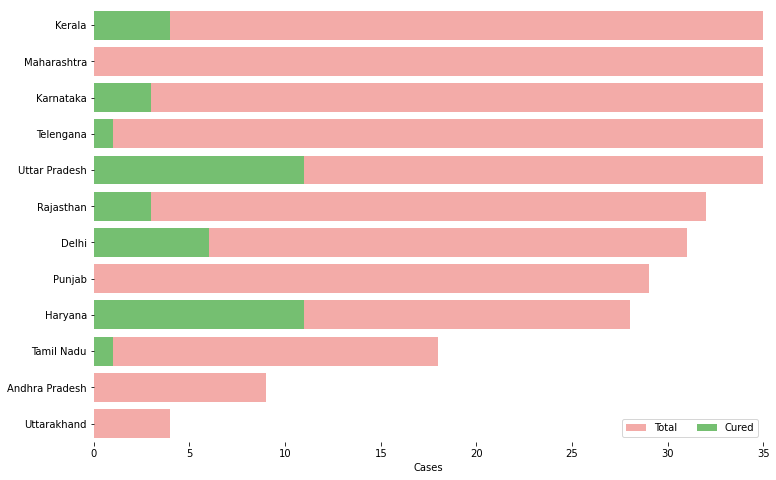

In [8]:
#Learn how to use Seaborn for visualization
f, ax = plt.subplots(figsize=(12, 8))
data = df_full[['Name of State / UT','Total cases','Cured','Death']]
data.sort_values('Total cases',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Total cases", y="Name of State / UT", data=data,label="Total", color="r")

sns.set_color_codes("muted")
sns.barplot(x="Cured", y="Name of State / UT", data=data, label="Cured", color="g")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 35), ylabel="",xlabel="Cases")
sns.despine(left=True, bottom=True)

How the Coronavirus cases are rising?

In [9]:
#This cell's code is required when you are working with plotly on colab
import plotly
plotly.io.renderers.default = 'colab'

In [10]:
#Learn how to create interactive graphs using plotly
# import plotly.graph_objects as go
# Rise of COVID-19 cases in India
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_India['Date'], y = dbd_India['Total Cases'], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

# New COVID-19 cases reported daily in India

import plotly.express as px
fig = px.bar(dbd_India, x="Date", y="New Cases", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in India on daily basis',plot_bgcolor='rgb(230, 230, 230)')

fig.show()

Cumulative cases in India, Italy, S.Korea, and Wuhan

In [11]:
# import plotly.express as px
fig = px.bar(dbd_India, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in India', color_discrete_sequence = px.colors.cyclical.IceFire)

'''Colour Scale for plotly
https://plot.ly/python/builtin-colorscales/
'''

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(dbd_Italy, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Italy', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(dbd_Korea, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in South Korea', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()
fig = px.bar(dbd_Wuhan, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Wuhan', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

Comparison between the rise of cases in Wuhan, S.Korea, Italy and India

In [12]:
#Learn how to create subplots using plotly
# import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=("S.Korea","Italy", "India","Wuhan"))

fig.add_trace(go.Bar(x=dbd_Korea['Date'], y=dbd_Korea['Total Cases'],
                    marker=dict(color=dbd_Korea['Total Cases'], coloraxis="coloraxis")),1, 1)

fig.add_trace(go.Bar(x=dbd_Italy['Date'], y=dbd_Italy['Total Cases'],
                    marker=dict(color=dbd_Italy['Total Cases'], coloraxis="coloraxis")),1, 2)

fig.add_trace(go.Bar(x=dbd_India['Date'], y=dbd_India['Total Cases'],
                    marker=dict(color=dbd_India['Total Cases'], coloraxis="coloraxis")),2, 1)

# fig.add_trace(go.Bar(x=dbd_Wuhan['Date'], y=dbd_Wuhan['Total Cases'],
#                     marker=dict(color=dbd_Wuhan['Total Cases'], coloraxis="coloraxis")),2, 2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False,title_text="Total Confirmed cases(Cumulative)")

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

 Trend after crossing 100 cases

In [13]:
# import plotly.graph_objects as go

title = 'Main Source for News'
labels = ['S.Korea', 'Italy', 'India']
colors = ['rgb(122,128,0)', 'rgb(255,0,0)', 'rgb(49,130,189)']

mode_size = [10, 10, 12]
line_size = [1, 1, 8]

fig = go.Figure()


fig.add_trace(go.Scatter(x=dbd_Korea['Days after surpassing 100 cases'], 
                 y=dbd_Korea['Total Cases'],mode='lines',
                 name=labels[0],
                 line=dict(color=colors[0], width=line_size[0]),            
                 connectgaps=True))
fig.add_trace(go.Scatter(x=dbd_Italy['Days after surpassing 100 cases'], 
                 y=dbd_Italy['Total Cases'],mode='lines',
                 name=labels[1],
                 line=dict(color=colors[1], width=line_size[1]),            
                 connectgaps=True))

fig.add_trace(go.Scatter(x=dbd_India['Days after surpassing 100 cases'], 
                 y=dbd_India['Total Cases'],mode='lines',
                 name=labels[2],
                 line=dict(color=colors[2], width=line_size[2]),            
                 connectgaps=True))
    
    
    
annotations = []

annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Days after crossing 100 cases ',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))

fig.update_layout(annotations=annotations,plot_bgcolor='white',yaxis_title='Cumulative cases')

fig.show()

Exploring Worldwide Data

In [15]:
df = pd.read_csv('/content/drive/My Drive/COVID PREDICTION/covid_19_clean_complete.csv',parse_dates=['Date'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

df_confirmed = pd.read_csv("/content/drive/My Drive/COVID PREDICTION/time_series_covid19_confirmed_global.csv")
df_recovered = pd.read_csv("/content/drive/My Drive/COVID PREDICTION/time_series_covid19_recovered_global.csv")
df_deaths = pd.read_csv("/content/drive/My Drive/COVID PREDICTION/time_series_covid19_deaths_global.csv")

df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)

In [16]:
df_deaths.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
df.head()

,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0


In [18]:
df2 = df.groupby(["Date", "Country", "Province/State"])[['Date', 'Province/State', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
df2.head()

,Date,Country,Province/State,Confirmed,Deaths,Recovered
0,2020-01-22,Australia,Australian Capital Territory,0.0,0.0,0.0
1,2020-01-22,Australia,From Diamond Princess,0.0,0.0,0.0
2,2020-01-22,Australia,New South Wales,0.0,0.0,0.0
3,2020-01-22,Australia,Northern Territory,0.0,0.0,0.0
4,2020-01-22,Australia,Queensland,0.0,0.0,0.0


In [19]:
# Check for India's data
df.query('Country=="India"').groupby("Date")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0
...,...,...,...,...
57,2020-03-19,194.0,4.0,15.0
58,2020-03-20,244.0,5.0,20.0
59,2020-03-21,330.0,4.0,23.0
60,2020-03-22,396.0,7.0,27.0


In [20]:
#Overall worldwide Confirmed/ Deaths/ Recovered cases 
df.groupby('Date').sum().head()

,Lat,Long,Confirmed,Deaths,Recovered
Date,,,,,
2020-01-22,7777.4793,1639.7021,554.0,17.0,28.0
2020-01-23,7777.4793,1639.7021,652.0,18.0,30.0
2020-01-24,7777.4793,1639.7021,939.0,26.0,36.0
2020-01-25,7777.4793,1639.7021,1432.0,42.0,39.0
2020-01-26,7777.4793,1639.7021,2113.0,56.0,52.0


Visualizing WorldWide COVID19 Data

In [21]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [22]:
fig = go.Figure()
#Plotting datewise confirmed cases
fig.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths['Date'], y=deaths['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='Worldwide NCOVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))

fig.show()

Forecasting Total Number of Cases Worldwide

In [23]:
from fbprophet import Prophet

In [24]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [25]:
confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [26]:
confirmed.tail()

,ds,y
57,2020-03-19,242708.0
58,2020-03-20,272166.0
59,2020-03-21,304524.0
60,2020-03-22,335955.0
61,2020-03-23,336004.0


Forecasting Confirmed NCOVID-19 Cases Worldwide with Prophet (Base model)

In [27]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [28]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,355136.872975,336465.418537,377263.214302
65,2020-03-27,372235.326938,352121.311059,392105.000299
66,2020-03-28,388674.964143,367651.511524,409552.131549
67,2020-03-29,405307.954675,384902.372674,427506.017774
68,2020-03-30,418529.648466,396073.754622,441226.887224


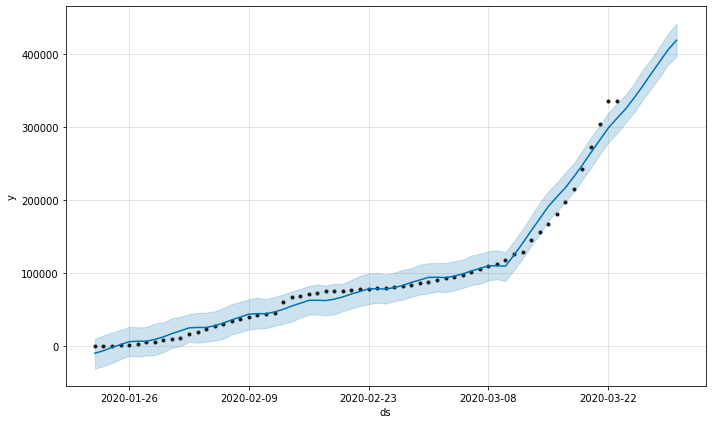

In [29]:
confirmed_forecast_plot = m.plot(forecast)

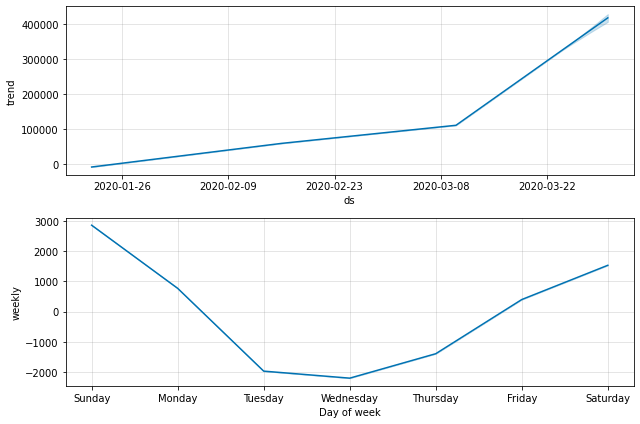

In [30]:
confirmed_forecast_plot =m.plot_components(forecast)

Forecasting Worldwide Deaths using Prophet (Base model)

In [31]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [32]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [33]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,15411.877522,14539.154307,16430.427797
65,2020-03-27,16199.617603,15218.818744,17133.149939
66,2020-03-28,17006.904589,16018.065381,17984.903300
67,2020-03-29,17831.505383,16784.126312,18930.481818
68,2020-03-30,18490.986176,17430.307191,19598.334897


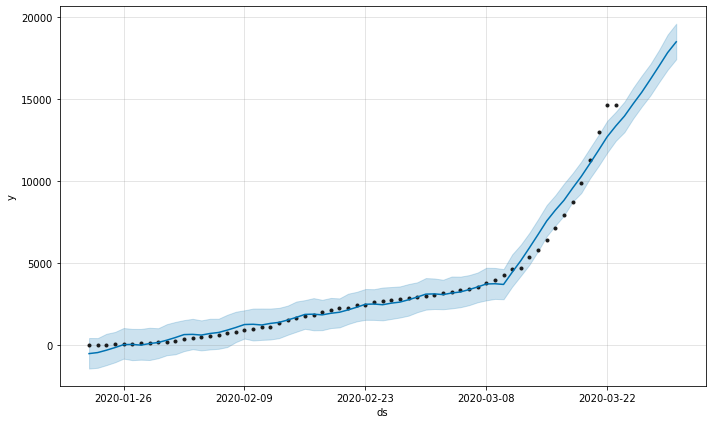

In [34]:
deaths_forecast_plot = m.plot(forecast)

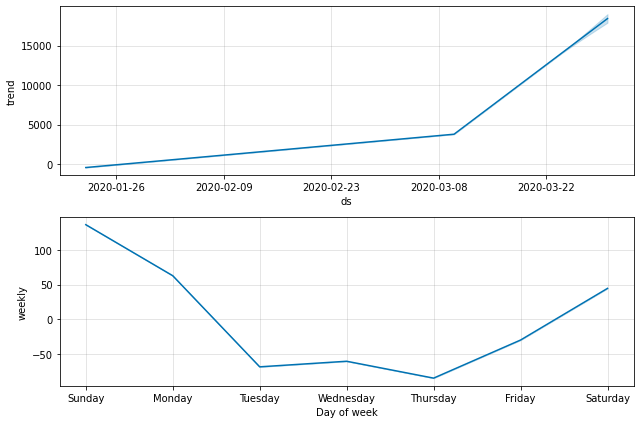

In [35]:
deaths_forecast_plot = m.plot_components(forecast)

Forecasting Worldwide Recovered Cases with Prophet (Base model)

In [36]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [37]:
m = Prophet(interval_width=0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [38]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,103001.351662,101253.390216,104777.338535
65,2020-03-27,105338.025042,103525.509845,107097.034225
66,2020-03-28,108256.310813,105951.261790,110392.216590
67,2020-03-29,111119.296170,108543.131234,113661.979866
68,2020-03-30,113244.961749,110206.497032,115975.141455


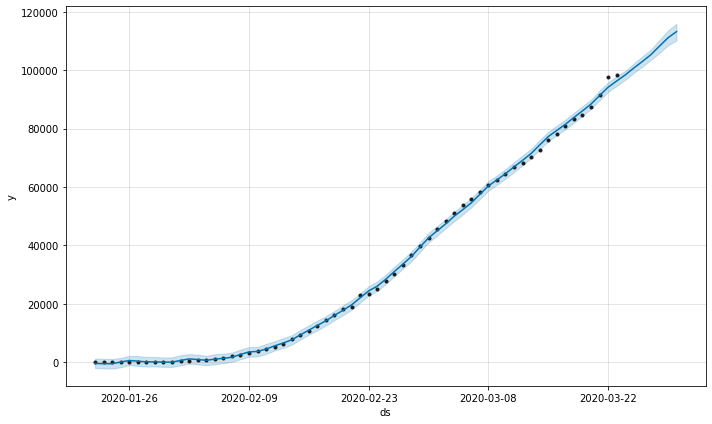

In [39]:
recovered_forecast_plot = m.plot(forecast)

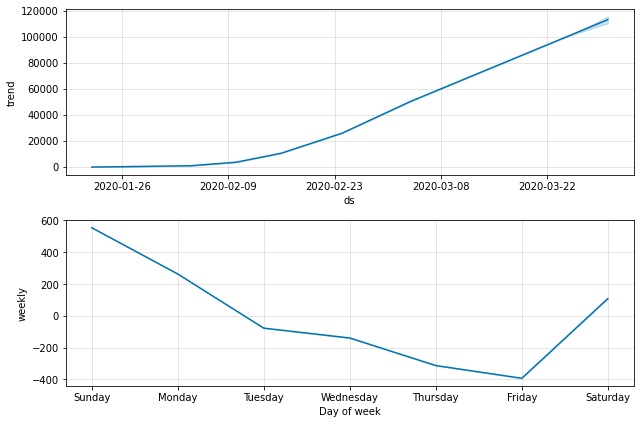

In [40]:
recovered_forecast_plot = m.plot_components(forecast)